<a href="https://colab.research.google.com/github/J-Nobull/Noble_ANA-680_FINAL/blob/main/Noble_ANA680.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up environment

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load data file and run initial inspection

In [ ]:
    # Load the dataset
health_import = pd.read_csv('HEALTH.csv')

    # Inspect
print(health_import.info())
print(health_import.tail())
print(health_import.describe())
print(health_import.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      740 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Find variables that have more than 12 unique values  
Will consolidate categories as able

In [ ]:
    # Display unique values for categorical columns (up to 12 values)
categorical_columns = health_import.select_dtypes(include=['object']).columns
for col in categorical_columns:
   print(f"\nUnique values in {col}: {health_import[col].unique()[:12]}")


Unique values in Timestamp: ['8/27/2014 11:29' '8/27/2014 11:30' '8/27/2014 11:31' '8/27/2014 11:32'
 '8/27/2014 11:33' '8/27/2014 11:34' '8/27/2014 11:35' '8/27/2014 11:36'
 '8/27/2014 11:37' '8/27/2014 11:38' '8/27/2014 11:39' '8/27/2014 11:40']

Unique values in Gender: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?']

Unique values in Country: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia']

Unique values in state: ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC']

Unique values in self_employed: [nan 'Yes' 'No']

Unique values in family_history: ['No' 'Yes']

Unique values in treatment: ['Yes' 'No']

Unique values in work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' nan]

Unique values in no_employees: ['25-Jun' 'More than 1000' '26-100' '100-500' '5-Jan' '500-1000']

Unique values in remote_work: ['No'

INSPECT 'comments'  
The question has very few responses (13%) and very few ADD to the mental health picture: DROP  
  
INSPECT 'Timestamp'

In [ ]:
print(health_import['Timestamp'].head(10)), (health_import['Timestamp'].tail())

0    8/27/2014 11:29
1    8/27/2014 11:29
2    8/27/2014 11:29
3    8/27/2014 11:29
4    8/27/2014 11:30
5    8/27/2014 11:31
6    8/27/2014 11:31
7    8/27/2014 11:32
8    8/27/2014 11:32
9    8/27/2014 11:32
Name: Timestamp, dtype: object


(None,
 1254     9/12/2015 11:17
 1255      9/26/2015 1:07
 1256     11/7/2015 12:36
 1257    11/30/2015 21:25
 1258      2/1/2016 23:04
 Name: Timestamp, dtype: object)

'Timestamp' appears to be WHEN each subject completed the survey.  
Dates range from August 2014 through February 2016.  
Likely kept as the identifier; no value to the feature: DROP

In [ ]:
    # Drop undesired columns
health_inspect = health_import.drop(columns=['Timestamp', 'comments'])

INSPECT  'Age'  
8 'Age' values immediatetly stand out as eroneous; in the outlier areas
Will replace all values outside 18 to 72 with mean value

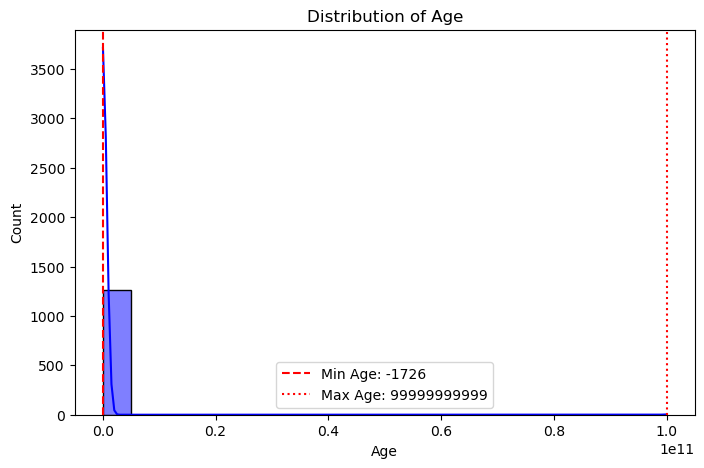

In [ ]:
    # Identify the minimum and maximum values in the 'Age' column
min_age = health_inspect['Age'].min()
max_age = health_inspect['Age'].max()

    # Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(health_inspect['Age'], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.axvline(min_age, color='red', linestyle='dashed', label=f"Min Age: {min_age}")
plt.axvline(max_age, color='red', linestyle='dotted', label=f"Max Age: {max_age}")
plt.legend()
plt.show()

99999999999 and 329 are obvious errors  
6 values less than 12 (including 3 negative, e.g. -1726) will also be replaced  
No other eroneous values appear in these records: will NOT DROP

count   1259.00
mean      32.07
std        7.27
min       18.00
25%       27.00
50%       31.00
75%       36.00
max       72.00
Name: Age, dtype: float64


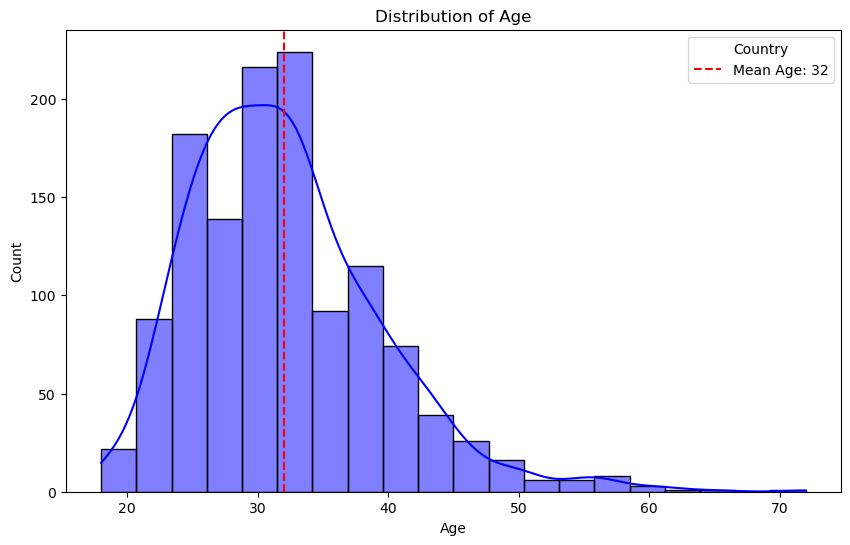

In [ ]:
   # Ensure all ages are positive (change -29 to 29)
health_inspect['Age'] = health_inspect['Age'].abs()

    # Get mean of ages 18 to 72
test_1 = health_inspect[(health_inspect['Age'] > 17) & (health_inspect['Age'] < 73)]
mean_age = int(test_1['Age'].mean())

    # Replace all outliers (17>Age<73) with the mean
health_inspect.loc[(health_inspect['Age'] < 17) | (health_inspect['Age'] > 73), 'Age'] = mean_age

    # Confirm
print(health_inspect['Age'].describe())

    # Plot cleaned Age distribution
plt.figure(figsize=(10,6))
sns.histplot(health_inspect['Age'], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.axvline(mean_age, color='red', linestyle='dashed', label=f"Mean Age: {mean_age}")
plt.ylabel("Count")
plt.legend(title='Country')
plt.show()

# Convert Age to categorical

In [ ]:
    # Break Age into 4 quartiles
health_inspect['Age_Cat'] = pd.qcut(
    health_inspect['Age'],
    q=4,  # Splits into 4 equal parts
    labels=[3, 2, 1, 0])  # Label the youngest as 3, oldest as 0)

    # Convert to category type
health_inspect['Age_Cat'] = health_inspect['Age_Cat'].astype('category')

    # Display value counts to verify equal distribution
print(health_inspect['Age_Cat'].dtype)
print(health_inspect['Age_Cat'].value_counts())

category
Age_Cat
3    363
1    316
0    296
2    284
Name: count, dtype: int64


With Age_Cat, 'Age' can be removed: DROP

INSPECT 'Gender', stands out as needing inspection  
Keep all reports when reducing to minimal categories

In [ ]:
    # Gender has over 12 values listed
health_inspect['Gender'].value_counts(dropna=False).sort_index(ascending=False)

    # Make a copy to progress
health_transform = health_inspect.copy()

    # Transform gender into three groups: '0', '1', '-1'
def categorize_gender(value):
    # Normalize strings
   value = str(value).strip().lower()

    # Define known male / female identifiers, categorize undefined or ambiguous gender values
   female_cat = {'female', 'f', 'woman', 'cis female', 'cis-female/femme', 'femake',
                         'femail', 'female (cis)'}
   male_cat = {'male', 'm', 'man', 'cis male', 'cis man', 'malr', 'mal', 'mail',
                        'make', 'msle', 'maile', 'male-ish', 'male (cis)', 'something kinda male?',
                        'ostensibly male, unsure what that really means', 'male leaning androgynous',
                        'Guy (-ish) ^_^', }

   if value in female_cat: return '1'
   elif value in male_cat: return '0'  # males will seek treatment less, =0 keeps coef positive
   else:                   return '-1'

    # Apply the categorization to the Gender column
health_transform.loc[:, 'Gender'] = health_transform['Gender'].apply(categorize_gender)

    # Confirm
health_transform['Gender'].value_counts().sort_index()

Gender
-1     18
0     994
1     247
Name: count, dtype: int64

The goal is to compare USA vs Other countries,  
the 18 Gender reports (neither Male, nor Female): will NOT DROP  
keep as Other(-1)  

INSPECT 'Country'

         Count  Percentage
Country                   
1          751       59.65
0          508       40.35


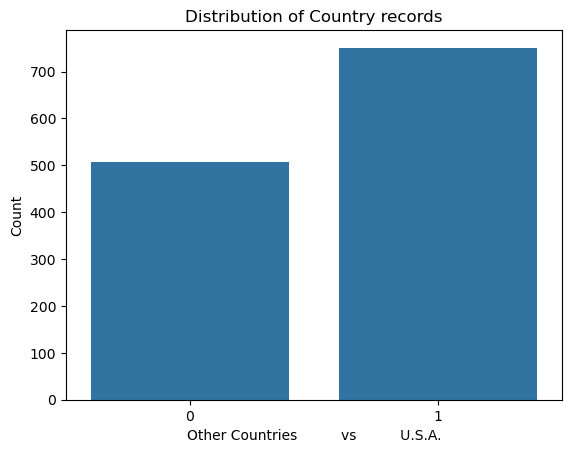

In [ ]:
    # Alter 'Country': US -> 1, all Other -> 0
health_transform['Country'] = health_transform['Country'].apply(lambda x: 1 if x == 'United States' else 0)
health_transform['Country'] = health_transform['Country'].astype('category')

    # Replace NA values in 'state' with 'XX'
health_transform['state'] = health_transform['state'].fillna('XX')

    # Combine for display
country_counts = health_transform['Country'].value_counts()
country_percent = (country_counts / country_counts.sum()) * 100
country_stats = pd.DataFrame({'Count': country_counts, 'Percentage': country_percent})

    # Confirm
print(country_stats)

   # Display
sns.countplot(x='Country', data=health_transform)
plt.title("Distribution of Country records")
plt.xlabel("Other Countries          vs          U.S.A.")
plt.ylabel("Count")
plt.show()

INSPECT 'self_employed'

In [ ]:
    # Change missing values in 'self_employed' to 'No'; employed by "tech company"
health_transform.fillna({'self_employed': 'No'}, inplace=True)

    # Confirm
health_transform['self_employed'].value_counts(dropna=False)

self_employed
No     1113
Yes     146
Name: count, dtype: int64

INSPECT 'work_interfere'  
interpolate missing values

In [ ]:
   # With 260 NA, do not want to drop all, convert for interpolation
work_interfere_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3}

    # Convert to numerical values for interpolation
health_transform['work_interfere'] = health_transform['work_interfere'].map(work_interfere_map)

    # Perform linear interpolation
health_transform['work_interfere'] = health_transform['work_interfere'].interpolate(method='linear')

    # Convert to ordered categorical
health_transform['work_interfere'] = pd.Categorical(
    health_transform['work_interfere'].round().astype(int),
    categories=[0, 1, 2, 3],
    ordered=True)

    # Confirm
print(health_transform['work_interfere'].isna().sum())
print(health_transform['work_interfere'].dtype)

0
category


Fix 'no_employees' and prepare categories for dummy variables

In [ ]:
    # Correct misinterpreted values in number of employees
health_transform['no_employees'] = health_transform['no_employees'].replace({
    '5-Jan': '1-5',
    '25-Jun': '6-25'})

    # Define mapping based on below rules
employee_category_map = {'1-5': 0, '6-25': 0,                 # SMALL : 1-25 employees→ 0
                         '26-100': 1, '100-500': 1,           # MEDIUM : 26-500 employees→ 1
                         '500-1000': 2, 'More than 1000': 2}  # LARGE : 500+ employees→ 2

    # Convert 'no_employees'
health_transform['no_employees'] = health_transform['no_employees'].map(employee_category_map)

    # Keep as ordered categorical
health_transform['no_employees'] = pd.Categorical(
    health_transform['no_employees'],
    categories=[0, 1, 2],
    ordered=True)

# Confirm
health_transform['no_employees'].dtype

CategoricalDtype(categories=[0, 1, 2], ordered=True, categories_dtype=int64)

INSPECT 'leave'

In [ ]:
    # Convert to ordered categorical
health_transform['leave'] = pd.Categorical(
    health_transform['leave'],
    categories=["Don't know", "Very easy", "Somewhat easy", "Somewhat difficult", "Very difficult"],
    ordered=True)

    # Rename categories
leave_mapping = {
    "Don't know": 0,
    "Very easy": 1,
    "Somewhat easy": 2,
    "Somewhat difficult": 3,
    "Very difficult": 4}

health_transform['leave'] = health_transform['leave'].cat.rename_categories(leave_mapping)

INSPECT remaining variables and prepare categories for dummy variables

In [ ]:
    # Change 'Don't know' and 'Not sure' to 'No'
    # Questions similar to "Do you know the options for mental health care your employer provides?"
health_transform = health_transform.map(
    lambda x: 'No' if isinstance(x, str) and x.strip().lower() in ["don't know", "not sure"] else x)

    # Change 'Some of them' to 'Yes'
    # Questions similar to "Willing to discuss your mental health with a supervisor?"
health_transform = health_transform.map(
    lambda x: 'Yes' if isinstance(x, str) and x.strip().lower() in ['some of them'] else x)

    # Change other columns to categorical with Yes/No and a few Maybe
bi_columns = ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company',
              'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity',
              'mental_health_consequence', 'phys_health_consequence', 'mental_health_interview',
              'phys_health_interview', 'coworkers', 'supervisor', 'mental_vs_physical', 'obs_consequence']

    # To fix warning
pd.set_option('future.no_silent_downcasting', True)

    # Convert Yes/No to 1/0 and Maybe to -1
health_transform[bi_columns] = (health_transform[bi_columns]
    .replace({'No': 0, 'Yes': 1, 'Maybe': '-1'})
    .astype('category'))

In [ ]:
    # Convert remaining object columns to categorical
object_columns = health_transform.select_dtypes(include=['object']).columns.tolist()
for col in object_columns:
   health_transform[col] = health_transform[col].astype('category')

    # Verify the unique values to confirm the transformation
print(health_transform[bi_columns].nunique())

self_employed                2
family_history               2
treatment                    2
remote_work                  2
tech_company                 2
benefits                     2
care_options                 2
wellness_program             2
seek_help                    2
anonymity                    2
mental_health_consequence    3
phys_health_consequence      3
mental_health_interview      3
phys_health_interview        3
coworkers                    2
supervisor                   2
mental_vs_physical           2
obs_consequence              2
dtype: int64


# Save cleaned datafile

In [ ]:
    # Make a final copy of the cleaned dataset
health_clean = health_transform.copy()

    # Confirm
print(health_clean.info())

    # Export
health_clean.to_excel("HEALTH_cleaned.xlsx", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1259 non-null   int64   
 1   Gender                     1259 non-null   category
 2   Country                    1259 non-null   category
 3   state                      1259 non-null   category
 4   self_employed              1259 non-null   category
 5   family_history             1259 non-null   category
 6   treatment                  1259 non-null   category
 7   work_interfere             1259 non-null   category
 8   no_employees               1259 non-null   category
 9   remote_work                1259 non-null   category
 10  tech_company               1259 non-null   category
 11  benefits                   1259 non-null   category
 12  care_options               1259 non-null   category
 13  wellness_program           1259 n

Display target variable balance and Country split

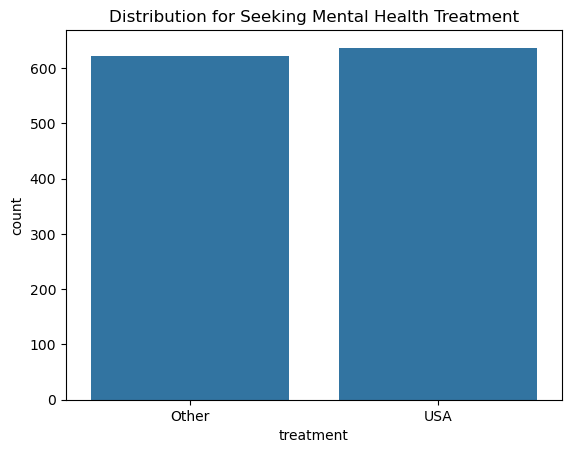

In [ ]:
sns.countplot(x='treatment', data=health_clean)
plt.title("Distribution for Seeking Mental Health Treatment")
plt.xticks(ticks=[0,1], labels=["Other", "USA"])
plt.show()

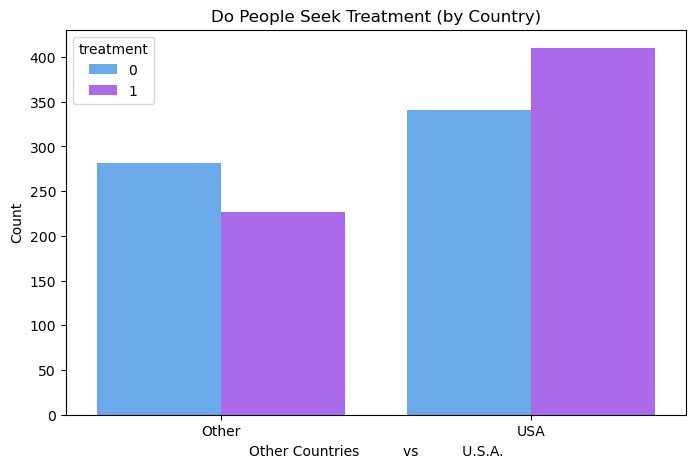

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Country', hue='treatment', data=health_clean, palette='cool')
plt.title("Do People Seek Treatment (by Country)")
plt.xlabel("Other Countries vs U.S.A.")
plt.xticks(ticks=[0,1], labels=["Other", "USA"])
plt.ylabel("Count")
plt.show()

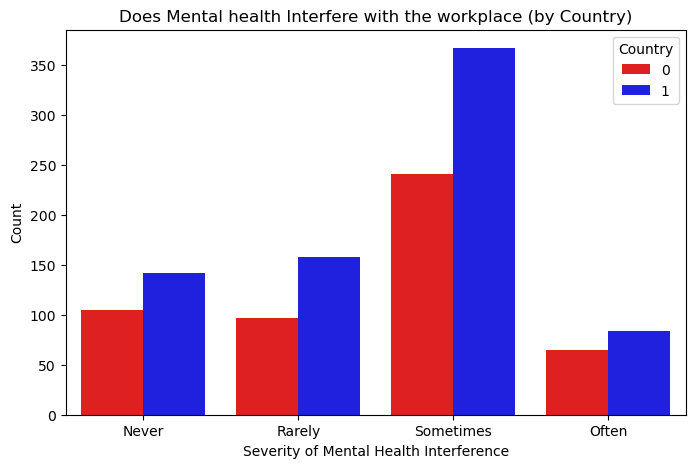

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='work_interfere', hue='Country', data=health_clean, palette=['red', 'blue'])
plt.title("Does Mental health Interfere with the workplace (by Country)")
plt.xlabel("Severity of Mental Health Interference")
plt.xticks(ticks=[0,1,2,3], labels=["Never", "Rarely", "Sometimes", "Often"])
plt.ylabel("Count")
plt.show()

In [ ]:
import itertools
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
    # Fence #1, [load here for modeling]
#health_clean = pd.read_excel('HEALTH_cleaned.xlsx')

'state' correlates to Country (USA) 100%: DROP  
Check correlations

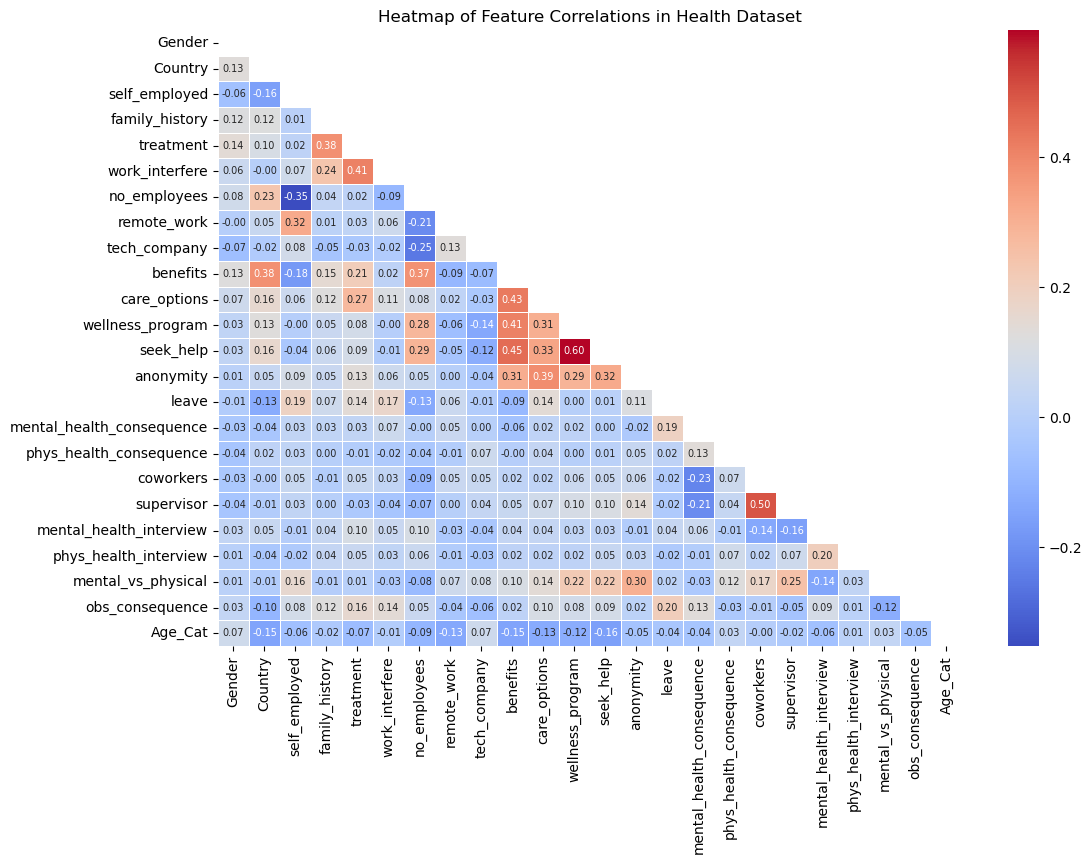

In [ ]:
    # Make a copy to progress
health_df = health_clean.drop(columns=['Age', 'state'])

    # Remove strings before correlation
corr_matrix = health_df.corr()

    # Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Display heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,  mask=mask, annot=True, annot_kws={"size": 7}, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations in Health Dataset")
plt.show()

Examine Chi-square

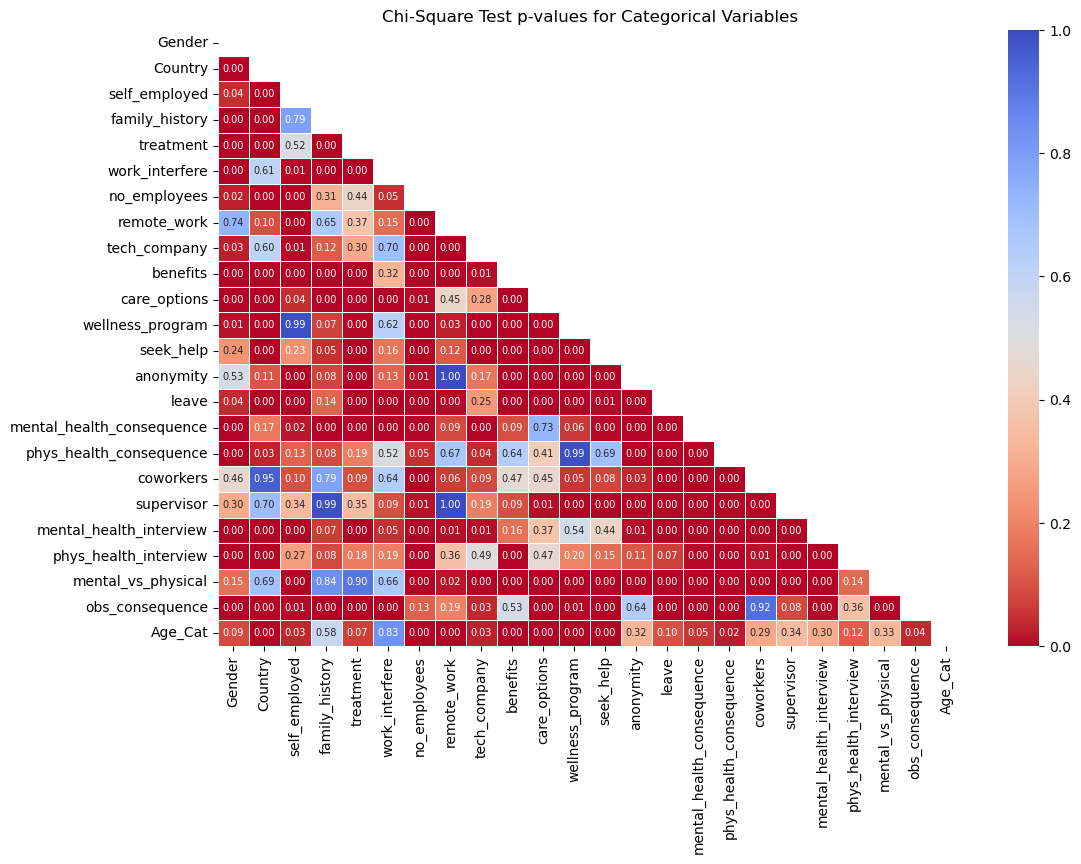

In [ ]:
    # Function to calculate Chi-Square p-value
def chi_square_test(x, y):
   """Perform Chi-Square test of independence and return p-value."""
   contingency_table = pd.crosstab(x, y)
   chi2, p, _, _ = stats.chi2_contingency(contingency_table)
   return p

    # Select categorical columns
categorical_columns = health_df.select_dtypes(include=['category']).columns.tolist()

    # Compute Cramér's V and Chi-Square tests for all categorical variable pairs
chi_square_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1, col2 in itertools.combinations(categorical_columns, 2):
   chi_square_results.loc[col1, col2] = chi_square_test(health_df[col1], health_df[col2])
   chi_square_results.loc[col2, col1] = chi_square_results.loc[col1, col2]

    # Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Convert results to numeric for readability
chi_square_results = chi_square_results.astype(float)

    # Display the Chi-Square test results heatmap (p-values)
plt.figure(figsize=(12, 8))
sns.heatmap(chi_square_results, mask=mask, annot=True, annot_kws={"size": 7}, cmap='coolwarm_r', fmt='.2f', linewidths=0.5)
plt.title("Chi-Square Test p-values for Categorical Variables")
plt.show()

# Encode dummy variables

In [ ]:
health_dum = pd.get_dummies(health_df, drop_first=True)
health_dum

,Gender_0,Gender_1,Country_1,self_employed_1,family_history_1,treatment_1,work_interfere_1,work_interfere_2,work_interfere_3,no_employees_1,...,supervisor_1,mental_health_interview_1,mental_health_interview_-1,phys_health_interview_1,phys_health_interview_-1,mental_vs_physical_1,obs_consequence_1,Age_Cat_2,Age_Cat_1,Age_Cat_0
0,False,True,True,False,False,True,False,False,True,False,...,True,False,False,False,True,True,False,False,False,True
1,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,True,False,False,False,...,True,True,False,True,False,False,False,False,True,False
3,True,False,False,False,True,True,False,False,True,True,...,False,False,True,False,True,False,True,True,False,False
4,True,False,True,False,False,False,False,False,False,True,...,True,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,True,False,False,False,False,True,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
1255,True,False,True,False,True,True,False,False,True,True,...,True,False,False,False,False,True,False,False,True,False
1256,True,False,True,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1257,False,True,True,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


# Split into train and test sets

In [ ]:
    # Define features and target variable
X = health_dum.drop(columns=['treatment_1'])
y = health_dum['treatment_1']

    # Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Initialize Logistic Regression Model

In [ ]:
    # Train model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

    # Run metrics
y_log_predict = log_model.predict(X_test)
y_log_proba = log_model.predict_proba(X_test)[:, 1]
log_cnfsn_matrix = confusion_matrix(y_test, y_log_predict)
log_class_report = classification_report(y_test, y_log_predict)

    # Save metrics for Logistic Regression
log_metrics = {
    "Accuracy": accuracy_score(y_test, y_log_predict),
    "F1 Score": f1_score(y_test, y_log_predict),
    "Precision": precision_score(y_test, y_log_predict),
    "Recall": recall_score(y_test, y_log_predict)}

    # Display
print("\nLog Reg Model Performance:")
print(log_metrics)
print("\nConfusion Matrix:\n", log_cnfsn_matrix)
print("\nClassification Report:\n", log_class_report)
print('Logistic Regression Probability Predictions:\n', y_log_proba)


Log Reg Model Performance:
{'Accuracy': 0.7142857142857143, 'F1 Score': 0.7096774193548387, 'Precision': 0.7154471544715447, 'Recall': 0.704}

Confusion Matrix:
 [[92 35]
 [37 88]]

Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.72      0.72       127
        True       0.72      0.70      0.71       125

    accuracy                           0.71       252
   macro avg       0.71      0.71      0.71       252
weighted avg       0.71      0.71      0.71       252

Logistic Regression Probability Predictions:
 [0.2296634  0.03084426 0.05184135 0.15515192 0.95940289 0.81244727
 0.89882864 0.34623604 0.13905052 0.69749644 0.2272437  0.16314503
 0.57614679 0.30880771 0.47365909 0.75618711 0.50483774 0.10976747
 0.21946552 0.45246993 0.41649317 0.19408151 0.0641289  0.33499248
 0.73651647 0.5319575  0.66934858 0.31894682 0.91951017 0.86897445
 0.92644574 0.25219738 0.30511247 0.22356093 0.81881046 0.09138007
 0.52201552 0.8722

In [ ]:
    # Feature Importance (Coefficients), ensure array is 1-dimensional
log_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_model.coef_.ravel()
}).sort_values(by='Coefficient', ascending=False)

log_features['Odds Ratio'] = np.exp(log_features['Coefficient'])
pd.options.display.float_format = '{:.2f}'.format
print(log_features)

                         Feature  Coefficient  Odds Ratio
7               work_interfere_3         2.81       16.58
6               work_interfere_2         1.78        5.95
5               work_interfere_1         1.41        4.10
4               family_history_1         1.28        3.59
13                care_options_1         0.93        2.53
25                   coworkers_1         0.66        1.94
12                    benefits_1         0.52        1.68
21   mental_health_consequence_1         0.50        1.65
22  mental_health_consequence_-1         0.44        1.55
29       phys_health_interview_1         0.37        1.45
35                     Age_Cat_0         0.31        1.37
27     mental_health_interview_1         0.30        1.35
32             obs_consequence_1         0.29        1.34
16                   anonymity_1         0.27        1.31
20                       leave_4         0.23        1.26
19                       leave_3         0.23        1.26
34            

# Initialize Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
    # Train Random Forest on the full dataset
rf_model = RandomForestClassifier(n_estimators=100, random_state=500)
rf_model.fit(X_train, y_train)

    # Predictions
y_rf_predict = rf_model.predict(X_test)

    #  Save Performanceto dictionary
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_rf_predict),
    "F1 Score": f1_score(y_test, y_rf_predict),
    "Precision": precision_score(y_test, y_rf_predict),
    "Recall": recall_score(y_test, y_rf_predict)}

    # Display
print("\nRandom Forest Model Performance:")
print(rf_metrics)
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_rf_predict))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_rf_predict))


Random Forest Model Performance:
{'Accuracy': 0.7261904761904762, 'F1 Score': 0.7136929460580913, 'Precision': 0.7413793103448276, 'Recall': 0.688}

Random Forest Confusion Matrix:
 [[97 30]
 [39 86]]

Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.76      0.74       127
        True       0.74      0.69      0.71       125

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252



# Initialize Support Vector Machines (SVM) Model

In [ ]:
    # Use Kernel for Nonlinear
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=500)
svm_model.fit(X_train, y_train)

    # Make Predictions w probabilities
y_svm_predict = svm_model.predict(X_test)
y_svm_proba = svm_model.predict_proba(X_test)[:, 1]

    # Save metrics for SVM
svm_metrics = {
    "Accuracy": accuracy_score(y_test, y_svm_predict),
    "F1 Score": f1_score(y_test, y_svm_predict),
    "Precision": precision_score(y_test, y_svm_predict),
    "Recall": recall_score(y_test, y_svm_predict)}

    # Classification Metrics
print("\nSVM Model Performance:")
print(svm_metrics)
print('Support Vector Machine Probability Predictions:\n', y_svm_proba)


SVM Model Performance:
{'Accuracy': 0.7222222222222222, 'F1 Score': 0.7107438016528925, 'Precision': 0.7350427350427351, 'Recall': 0.688}
Support Vector Machine Probability Predictions:
 [0.21798676 0.06019377 0.10758677 0.36286866 0.92814101 0.82528047
 0.88500493 0.3993469  0.16028574 0.72269166 0.17213651 0.27081286
 0.55135992 0.35361515 0.46929381 0.67361465 0.67629582 0.1175551
 0.25621613 0.23256778 0.65413622 0.24600859 0.14047253 0.2450875
 0.73890777 0.57146978 0.7389048  0.19644439 0.85478904 0.78673688
 0.91400194 0.35288976 0.40287077 0.28777436 0.66007356 0.13938554
 0.65974855 0.80670758 0.70585161 0.04348005 0.2043643  0.5817822
 0.91090745 0.10608034 0.2965262  0.88888009 0.18256718 0.13205708
 0.82392423 0.74247542 0.5284867  0.85493888 0.87188002 0.19951812
 0.75972807 0.35577864 0.47323452 0.5        0.70390984 0.42966835
 0.579854   0.65311603 0.41377554 0.33739205 0.87799959 0.83124722
 0.84381985 0.77428757 0.45140679 0.83006101 0.4268826  0.66928412
 0.16970389

In [ ]:
    # Compute permutation importance
perm_importance = permutation_importance(svm_model, X_test, y_test,
                scoring='accuracy', n_repeats=10, random_state=500)

    # Store df
feature_importance_svm = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

    # Display feature importance
print(feature_importance_svm)

                         Feature  Importance
4               family_history_1        0.10
6               work_interfere_2        0.04
7               work_interfere_3        0.03
25                   coworkers_1        0.02
12                    benefits_1        0.02
13                care_options_1        0.02
30      phys_health_interview_-1        0.01
5               work_interfere_1        0.01
0                       Gender_0        0.01
16                   anonymity_1        0.01
19                       leave_3        0.01
10                 remote_work_1        0.00
24    phys_health_consequence_-1        0.00
28    mental_health_interview_-1        0.00
32             obs_consequence_1        0.00
3                self_employed_1        0.00
26                  supervisor_1        0.00
1                       Gender_1        0.00
21   mental_health_consequence_1        0.00
11                tech_company_1        0.00
27     mental_health_interview_1        0.00
34        

Compare model metrics


Confusion Matrix:
 [[92 35]
 [37 88]]

Random Forest Confusion Matrix:
 [[97 30]
 [39 86]]


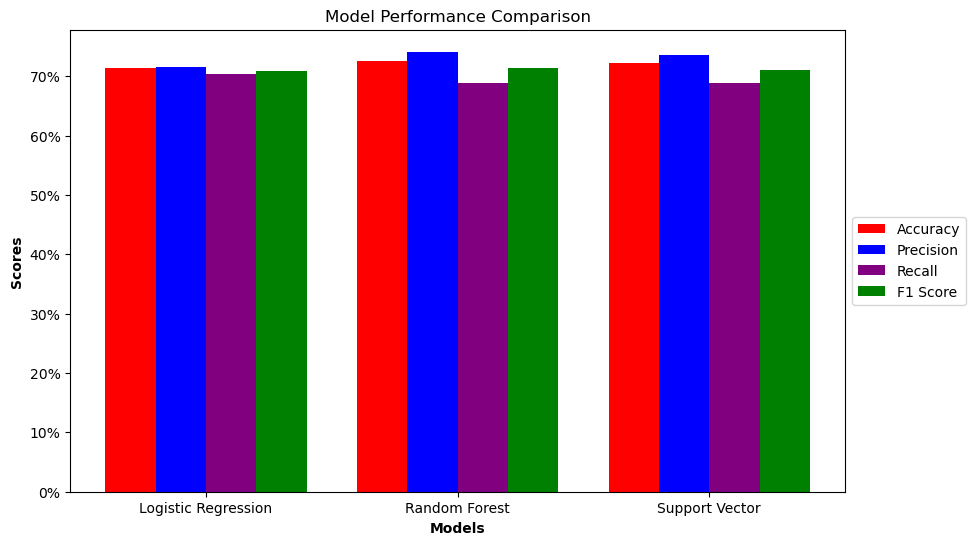

In [ ]:
import matplotlib.ticker as mtick

    # Model names and metrics
models = ['Logistic Regression', 'Random Forest', 'Support Vector']
accuracy = [log_metrics["Accuracy"], rf_metrics["Accuracy"], svm_metrics["Accuracy"]]
precision = [log_metrics["Precision"], rf_metrics["Precision"], svm_metrics["Precision"]]
recall = [log_metrics["Recall"], rf_metrics["Recall"], svm_metrics["Recall"]]
f1_score_values = [log_metrics["F1 Score"], rf_metrics["F1 Score"], svm_metrics["F1 Score"]]

    # Bar options
bar_width = 0.2

    # Set positions for bars
x = np.arange(len(models))

     # Plot Bar chart Metrics
print("\nLog Reg Confusion Matrix:\n", log_cnfsn_matrix)
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_rf_predict))

plt.figure(figsize=(10,6))
plt.bar(x - bar_width*1.5, accuracy, width=bar_width, label='Accuracy', color='r')
plt.bar(x - bar_width/2, precision, width=bar_width, label='Precision', color='b')
plt.bar(x + bar_width/2, recall, width=bar_width, label='Recall', color='purple')
plt.bar(x + bar_width*1.5, f1_score_values, width=bar_width, label='F1 Score', color='g')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks(x, models)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Model Performance Comparison")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Tried Utilizing TensorFlow, but it is not compatible* with the latest version of Python (v.12)  
(*From github.com)
# Initialize Long Short-Term Memory (LSTM) Model

In [ ]:
    # Utilized Github copilot for help with torch programming
import torch
import torch.nn as nn
import torch.optim as optim

    # Set up model
random_state = 500
torch.manual_seed(random_state)

    # Define LSTM Model
class LSTMModel(nn.Module):
   def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
   def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the last time step output
        return out

    # Define model
input_size = 12
hidden_size = 256
output_size = 1  # Binary classification (0 or 1)
model = LSTMModel(input_size, hidden_size, output_size)

    # Define Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()  # For binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Ensure Data is Properly Shaped
X_trn = torch.randn(600, 6, input_size)  # 600 samples, sequence length 6, features 12
y_trn = torch.randint(0, 2, (600,), dtype=torch.float32)  # Binary labels (0 or 1)

X_tst = torch.randn(150, 6, input_size)  # 150 test samples
y_tst = torch.randint(0, 2, (150,), dtype=torch.float32)  # match sample size

    # Training Loop
num_epochs = 10
for epoch in range(num_epochs):
   model.train()
   optimizer.zero_grad()
   outputs = model(X_trn).squeeze()
   loss = criterion(outputs, y_trn)
   loss.backward()
   optimizer.step()
   if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Evaluation of Test Set
model.eval()
with torch.no_grad():
   y_tst_logits = model(X_tst).squeeze()
   y_tst_pred = torch.sigmoid(y_tst_logits).round()  # Convert logits to 0 or 1

    # Convert to NumPy for sklearn metrics
y_tst_np = y_tst.numpy()
y_tst_pred_np = y_tst_pred.numpy()

    # Save metrics for LSTM
lstm_metrics = {
   "Accuracy": accuracy_score(y_tst_np, y_tst_pred_np),
   "F1 Score": f1_score(y_tst_np, y_tst_pred_np),
   "Precision": precision_score(y_tst_np, y_tst_pred_np),
   "Recall": recall_score(y_tst_np, y_tst_pred_np)}

    # Compute classification metrics
print("\nLSTM Model Performance:")
print(lstm_metrics)

Epoch [5/10], Loss: 0.6883
Epoch [10/10], Loss: 0.6814

LSTM Model Performance:
{'Accuracy': 0.4866666666666667, 'F1 Score': 0.33043478260869563, 'Precision': 0.4318181818181818, 'Recall': 0.2676056338028169}


# Initialize Fully Connected Neural Network (FNN) Model

In [ ]:
    # Utilized Github copilot with torch programming
    # Set up FNN Model
random_state = 500
torch.manual_seed(random_state)

class FNNModel(nn.Module):
   def __init__(self, input_size):
        super(FNNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # First hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)  # Second hidden layer
        self.fc3 = nn.Linear(32, 1)  # Output layer (Binary Classification)
   def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No activation since we'll use BCEWithLogitsLoss()
        return x

    # Define model
input_size = 72  # 6*12=72: Same as LSTM input size
fnn_model = FNNModel(input_size)

    # Define Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()  # For binary classification
optimizer = optim.Adam(fnn_model.parameters(), lr=0.001)

    # Ensure Data is Properly Shaped
X_trn_flat = X_trn.reshape(X_trn.shape[0], -1)  # Flatten for FNN
X_tst_flat = X_tst.reshape(X_tst.shape[0], -1)

# Training Loop
num_epochs = 20
for epoch in range(num_epochs):
   fnn_model.train()
   optimizer.zero_grad()
   outputs = fnn_model(X_trn_flat).squeeze()
   loss = criterion(outputs, y_trn)
   loss.backward()
   optimizer.step()

   if (epoch + 1) % 5 == 0:
        print(f'FNN Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# **Evaluation on Test Set**
fnn_model.eval()
with torch.no_grad():
   y_tst_logits_fnn = fnn_model(X_tst_flat).squeeze()
   y_tst_pred_fnn = torch.sigmoid(y_tst_logits_fnn).round()  # Convert logits to 0 or 1

# Convert to NumPy for sklearn metrics
y_tst_pred_fnn_np = y_tst_pred_fnn.numpy()

    # Store FNN metrics
fnn_metrics = {
    "Accuracy": accuracy_score(y_tst, y_tst_pred_fnn_np),
    "F1 Score": f1_score(y_tst, y_tst_pred_fnn_np),
    "Precision": precision_score(y_tst, y_tst_pred_fnn_np),
    "Recall": recall_score(y_tst, y_tst_pred_fnn_np)}

    # Display FNN metrics table
print("\nFNN Model Performance:")
print(fnn_metrics)

FNN Epoch [5/20], Loss: 0.6876
FNN Epoch [10/20], Loss: 0.6793
FNN Epoch [15/20], Loss: 0.6697
FNN Epoch [20/20], Loss: 0.6573

FNN Model Performance:
{'Accuracy': 0.47333333333333333, 'F1 Score': 0.3875968992248062, 'Precision': 0.43103448275862066, 'Recall': 0.352112676056338}


# Compare models

In [ ]:
    # Display all metrics for comparison
metrics_df = pd.DataFrame({
    "Metric":  ["Accuracy", "F1 Score", "Precision", "Recall"],
    "    Log": list(log_metrics.values()),
    "    RF": list(rf_metrics.values()),
    "    SVM": list(svm_metrics.values()),
    "    LSTM": list(lstm_metrics.values()),
    "    FNN": list(fnn_metrics.values())})

    # Display table
print("\nModel Performance Comparison:")
print(metrics_df)


Model Performance Comparison:
      Metric      Log      RF      SVM      LSTM      FNN
0   Accuracy     0.71    0.73     0.72      0.49     0.47
1   F1 Score     0.71    0.71     0.71      0.33     0.39
2  Precision     0.72    0.74     0.74      0.43     0.43
3     Recall     0.70    0.69     0.69      0.27     0.35


Log did have higher aveage scores, even before locking the random_state  
Proceed with testing the data based on 'USA' or 'Other' split  
# Re-run the LogReg model
Show the distribution of Country_1

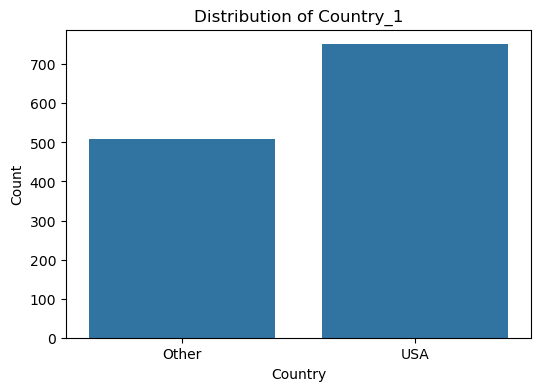

In [ ]:
    # Plot
plt.figure(figsize=(6,4))
sns.countplot(x=health_dum['Country_1'])
plt.xticks(ticks=[0,1], labels=["Other", "USA"])
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Distribution of Country_1")
plt.show()

In [ ]:
    # Split data into USA and Other based on 'Country_1'
health_usa = health_dum[health_dum['Country_1'] == True].drop(columns=['Country_1'])
health_other = health_dum[health_dum['Country_1'] == False].drop(columns=['Country_1'])

In [ ]:
    # Used Github Copilot to assist in debugging the split
    # Filtering based on Country_1 = USA (True) and Others (False)

    # Split dataset based on Country_1
X_train_USA = X_train[X_train['Country_1'] == 1].drop(columns=['Country_1'])
y_train_USA = y_train[X_train['Country_1'] == 1]
X_train_Other = X_train[X_train['Country_1'] == 0].drop(columns=['Country_1'])
y_train_Other = y_train[X_train['Country_1'] == 0]

X_test_USA = X_test[X_test['Country_1'] == 1].drop(columns=['Country_1'])
y_test_USA = y_test[X_test['Country_1'] == 1].values
X_test_Other = X_test[X_test['Country_1'] == 0].drop(columns=['Country_1'])
y_test_Other = y_test[X_test['Country_1'] == 0].values

    # Train Logistic Regression for USA
logreg_usa = LogisticRegression(max_iter=500, solver='lbfgs', random_state=500)
logreg_usa.fit(X_train_USA, y_train_USA)
logreg_y_pred_usa = logreg_usa.predict(X_test_USA)

    # Train Logistic Regression for Other Countries
logreg_other = LogisticRegression(max_iter=500, solver='lbfgs', random_state=500)
logreg_other.fit(X_train_Other, y_train_Other)
logreg_y_pred_other = logreg_other.predict(X_test_Other)

    # Evaluate Performance for USA
logreg_f1_usa = f1_score(y_test_USA, logreg_y_pred_usa)
logreg_precision_usa = precision_score(y_test_USA, logreg_y_pred_usa)
logreg_recall_usa = recall_score(y_test_USA, logreg_y_pred_usa)
logreg_accuracy_usa = accuracy_score(y_test_USA, logreg_y_pred_usa)

    # Evaluate Performance for Other Countries
logreg_f1_other = f1_score(y_test_Other, logreg_y_pred_other)
logreg_precision_other = precision_score(y_test_Other, logreg_y_pred_other)
logreg_recall_other = recall_score(y_test_Other, logreg_y_pred_other)
logreg_accuracy_other = accuracy_score(y_test_Other, logreg_y_pred_other)

    # Store results
logistic_results = pd.DataFrame({
    "LR Metric": ["Accuracy", "F1 Score", "Precision", "Recall"], "     "
    "USA": [logreg_accuracy_usa, logreg_f1_usa, logreg_precision_usa, logreg_recall_usa],
    "Other Countries": [logreg_accuracy_other, logreg_f1_other, logreg_precision_other, logreg_recall_other]})

    # Display results
print(logistic_results)

   LR Metric       USA  Other Countries
0   Accuracy      0.73             0.70
1   F1 Score      0.75             0.62
2  Precision      0.77             0.65
3     Recall      0.73             0.60


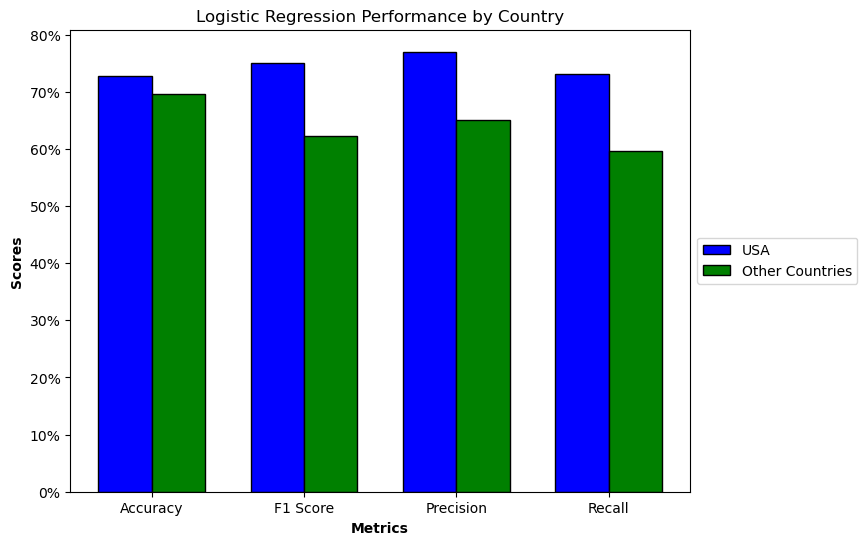

In [ ]:
    # Define metrics and their values
metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
logreg_usa_values = [logreg_accuracy_usa, logreg_f1_usa, logreg_precision_usa, logreg_recall_usa]
logreg_other_values = [logreg_accuracy_other, logreg_f1_other, logreg_precision_other, logreg_recall_other]

    # Set bar options
bar_width = 0.35
index = np.arange(len(metrics))

    # Create the grouped bar chart
plt.figure(figsize=(8,6))
plt.bar(index, logreg_usa_values, bar_width, label="USA", color='b', edgecolor='black')
plt.bar(index + bar_width, logreg_other_values, bar_width, label="Other Countries", color='g', edgecolor='black')

    # Format plot
plt.xlabel("Metrics", fontweight="bold")
plt.ylabel("Scores", fontweight="bold")
plt.title("Logistic Regression Performance by Country")
plt.xticks(index + bar_width / 2, metrics)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Extract feature importance for each country model
    # Get coefficients for USA
usa_log_feature_importance = pd.DataFrame({
    "Feature": X_train_USA.columns,
    "Coefficient_USA": logreg_usa.coef_.ravel()})

    # Get coefficients for Other Countries
other_log_feature_importance = pd.DataFrame({
    "Feature": X_train_Other.columns,
    "Coefficient_Other": logreg_other.coef_.ravel()})

    # Merge together
log_feature_comparison = usa_log_feature_importance.merge(other_log_feature_importance, on="Feature")

    # Compute differences between USA and Other
log_feature_comparison["Diff"] = (
    log_feature_comparison["Coefficient_USA"] - log_feature_comparison["Coefficient_Other"])

    # Display results, with Other's strongest featureson top
print(log_feature_comparison.sort_values(by="Diff", ascending=True))

                         Feature  Coefficient_USA  Coefficient_Other  Diff
13            wellness_program_1            -0.39               0.55 -0.93
24                   coworkers_1             0.27               1.13 -0.86
2                self_employed_1            -0.49               0.15 -0.64
8                 no_employees_2            -0.51               0.01 -0.52
32                     Age_Cat_2            -0.18               0.28 -0.47
29      phys_health_interview_-1            -0.09               0.24 -0.33
16                       leave_1            -0.25               0.07 -0.32
31             obs_consequence_1             0.14               0.44 -0.30
34                     Age_Cat_0             0.09               0.36 -0.28
30          mental_vs_physical_1            -0.02               0.23 -0.25
7                 no_employees_1            -0.02               0.21 -0.23
25                  supervisor_1            -0.26              -0.09 -0.17
20   mental_health_conseq

In [ ]:
    # Train Random Forest for USA
rf_usa = RandomForestClassifier(n_estimators=100, random_state=500)
rf_usa.fit(X_train_USA, y_train_USA)
rf_y_pred_usa = rf_usa.predict(X_test_USA)

    # Train Random Forest for Other Countries
rf_other = RandomForestClassifier(n_estimators=100, random_state=500)
rf_other.fit(X_train_Other, y_train_Other)
rf_y_pred_other = rf_other.predict(X_test_Other)

    # Evaluate Performance for USA
rf_f1_usa = f1_score(y_test_USA, rf_y_pred_usa)
rf_precision_usa = precision_score(y_test_USA, rf_y_pred_usa)
rf_recall_usa = recall_score(y_test_USA, rf_y_pred_usa)
rf_accuracy_usa = accuracy_score(y_test_USA, rf_y_pred_usa)

    # Evaluate Performance for Other Countries
rf_f1_other = f1_score(y_test_Other, rf_y_pred_other)
rf_precision_other = precision_score(y_test_Other, rf_y_pred_other)
rf_recall_other = recall_score(y_test_Other, rf_y_pred_other)
rf_accuracy_other = accuracy_score(y_test_Other, rf_y_pred_other)

    # Store results
rf_results = pd.DataFrame({
    "RF Metric": ["Accuracy", "F1 Score", "Precision", "Recall"],
     "     "
    "USA": [rf_accuracy_usa, rf_f1_usa, rf_precision_usa, rf_recall_usa],
    "Other Countries": [rf_accuracy_other, rf_f1_other, rf_precision_other, rf_recall_other]})

    # Display results
print(rf_results)

   RF Metric       USA  Other Countries
0   Accuracy      0.71             0.63
1   F1 Score      0.74             0.53
2  Precision      0.74             0.57
3     Recall      0.73             0.49


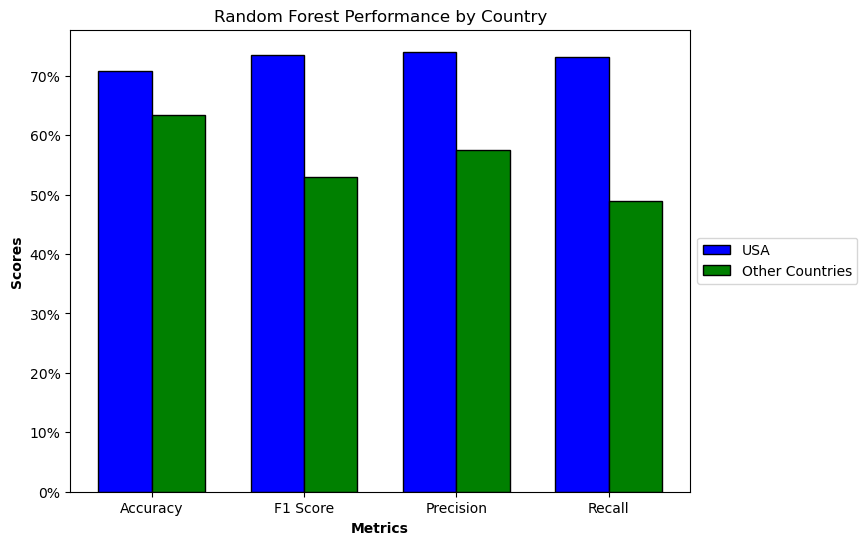

In [ ]:
    # Define metrics and values for Random Forest
metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
rf_usa_values = [rf_accuracy_usa, rf_f1_usa, rf_precision_usa, rf_recall_usa]
rf_other_values = [rf_accuracy_other, rf_f1_other, rf_precision_other, rf_recall_other]

    # Set bar options
bar_width = 0.35
index = np.arange(len(metrics))

    # Create the grouped bar chart for Random Forest performance
plt.figure(figsize=(8,6))
plt.bar(index, rf_usa_values, bar_width, label="USA", color='b', edgecolor='black')
plt.bar(index + bar_width, rf_other_values, bar_width, label="Other Countries", color='g', edgecolor='black')

    # Format plot
plt.xlabel("Metrics", fontweight="bold")
plt.ylabel("Scores", fontweight="bold")
plt.title("Random Forest Performance by Country")
plt.xticks(index + bar_width / 2, metrics)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

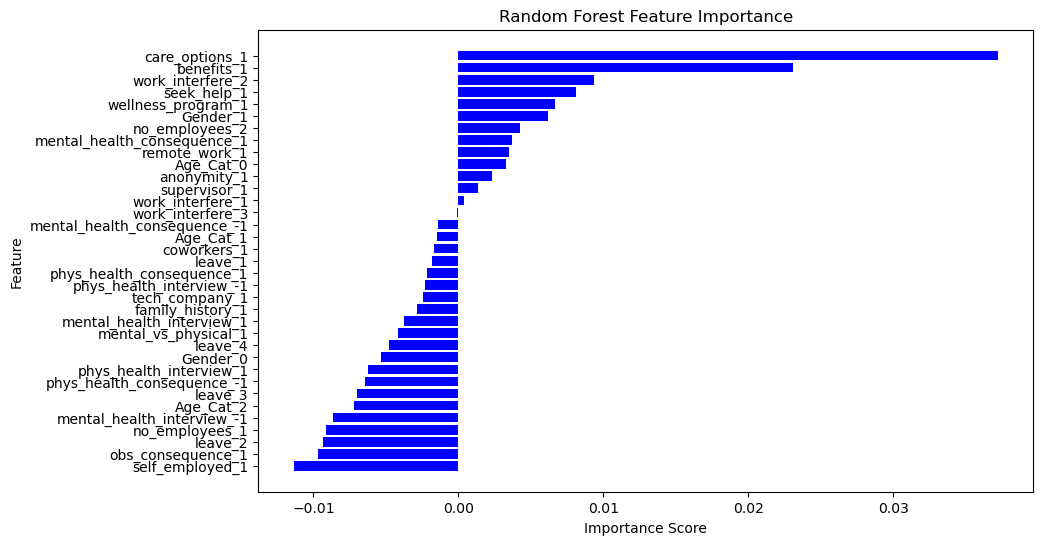

                         Feature  Importance_USA  Importance_Other  Diff
32               self_employed_1            0.01              0.02 -0.01
25             obs_consequence_1            0.02              0.03 -0.01
19                       leave_2            0.02              0.03 -0.01
11                no_employees_1            0.03              0.04 -0.01
27    mental_health_interview_-1            0.02              0.03 -0.01
24                     Age_Cat_2            0.02              0.03 -0.01
30                       leave_3            0.02              0.02 -0.01
21    phys_health_consequence_-1            0.02              0.03 -0.01
29       phys_health_interview_1            0.02              0.02 -0.01
15                      Gender_0            0.03              0.03 -0.01
31                       leave_4            0.01              0.02 -0.00
22          mental_vs_physical_1            0.02              0.03 -0.00
34     mental_health_interview_1            0.00   

In [ ]:
    # Extract feature importance
rf_feature_importance_usa = pd.DataFrame({
    "Feature": X_train_USA.columns,
    "Importance": rf_usa.feature_importances_
}).sort_values(by="Importance", ascending=False)

rf_feature_importance_other = pd.DataFrame({
    "Feature": X_train_Other.columns,
    "Importance": rf_other.feature_importances_
}).sort_values(by="Importance", ascending=False)

    # Merge together
rf_feature_comparison = rf_feature_importance_usa.merge(
    rf_feature_importance_other, on="Feature", suffixes=("_USA", "_Other"))

    # Compute absolute differences between USA and Other
rf_feature_comparison["Diff"] = (
    rf_feature_comparison["Importance_USA"] - rf_feature_comparison["Importance_Other"])

    # Sort by the largest differences
rf_feature_comparison = rf_feature_comparison.sort_values(by="Diff", ascending=True)

    # Display results, with Other's strongest features on top
# Plot Feature Importance
plt.figure(figsize=(10,6))
bar_width = 0.2
plt.barh(rf_feature_comparison["Feature"], rf_feature_comparison["Diff"], color='blue')  # Pass both x and y
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()
print(rf_feature_comparison)

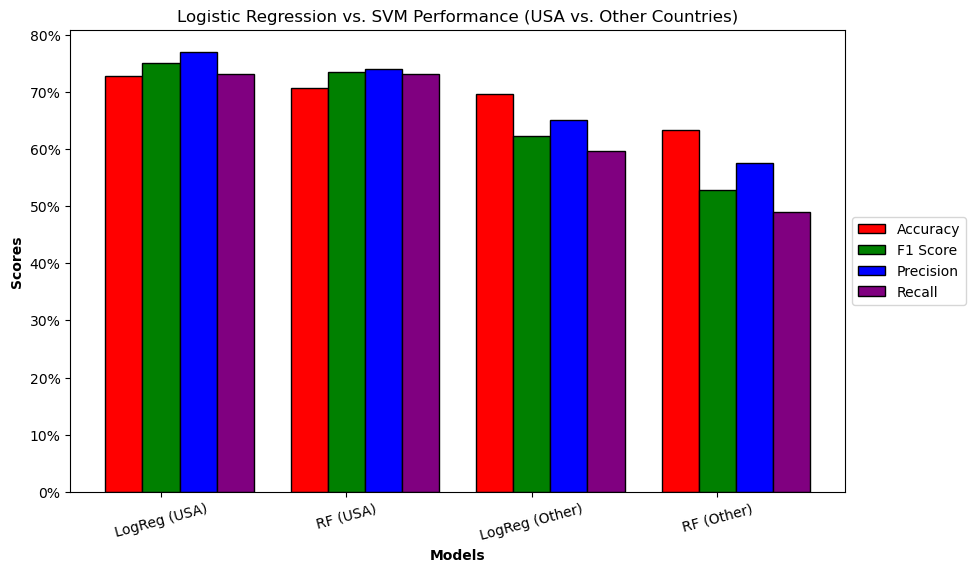

In [ ]:
    # Model names and metrics
models = ['LogReg (USA)', 'RF (USA)', 'LogReg (Other)', 'RF (Other)']

    # Performance metrics for each model
accuracy = [logreg_accuracy_usa, rf_accuracy_usa, logreg_accuracy_other, rf_accuracy_other]
f1 = [logreg_f1_usa, rf_f1_usa, logreg_f1_other, rf_f1_other]
precision = [logreg_precision_usa, rf_precision_usa, logreg_precision_other, rf_precision_other]
recall = [logreg_recall_usa, rf_recall_usa, logreg_recall_other, rf_recall_other]

    # Plot options
bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

    # Create bar chart
plt.figure(figsize=(10,6))
plt.bar(r1, accuracy, color='red', width=bar_width, edgecolor='black', label='Accuracy')
plt.bar(r2, f1, color='green', width=bar_width, edgecolor='black', label='F1 Score')
plt.bar(r3, precision, color='blue', width=bar_width, edgecolor='black', label='Precision')
plt.bar(r4, recall, color='purple', width=bar_width, edgecolor='black', label='Recall')

    # Format plot
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=15)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Convert to percentage
plt.title("Logistic Regression vs. SVM Performance (USA vs. Other Countries)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
print(health_df.shape)
print(health_df.info())

(1259, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     1259 non-null   category
 1   Country                    1259 non-null   category
 2   self_employed              1259 non-null   category
 3   family_history             1259 non-null   category
 4   treatment                  1259 non-null   category
 5   work_interfere             1259 non-null   category
 6   no_employees               1259 non-null   category
 7   remote_work                1259 non-null   category
 8   tech_company               1259 non-null   category
 9   benefits                   1259 non-null   category
 10  care_options               1259 non-null   category
 11  wellness_program           1259 non-null   category
 12  seek_help                  1259 non-null   category
 13  anonymity             

END